In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Data processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn import datasets

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv("lab10.csv", skipinitialspace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
9994,537224,21361,LOVE LARGE WOOD LETTERS,1.0,12/5/2010 16:24,12.75,13174.0,United Kingdom
9995,537224,22622,BOX OF VINTAGE ALPHABET BLOCKS,2.0,12/5/2010 16:24,9.95,13174.0,United Kingdom
9996,537224,22623,BOX OF VINTAGE JIGSAW BLOCKS,2.0,12/5/2010 16:24,4.95,13174.0,United Kingdom
9997,537224,21363,HOME SMALL WOOD LETTERS,2.0,12/5/2010 16:24,4.95,13174.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    9999 non-null   object 
 1   StockCode    9855 non-null   object 
 2   Description  9813 non-null   object 
 3   Quantity     9855 non-null   float64
 4   InvoiceDate  9855 non-null   object 
 5   UnitPrice    9855 non-null   float64
 6   CustomerID   7615 non-null   float64
 7   Country      9855 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [4]:
df = df.sample(frac=1)

In [5]:
df.isnull().sum()

InvoiceNo         0
StockCode       144
Description     186
Quantity        144
InvoiceDate     144
UnitPrice       144
CustomerID     2384
Country         144
dtype: int64

In [6]:
#Parsing Dates
#date_lengths=16 :12/12/2010 12:26
#date_lengths=15 :12/12/2010 8:26
#date_lengths=14 :12/1/2010 8:26
#date_lengths=13 :1/1/2010 8:26
date_lengths = df.InvoiceDate.str.len()
date_lengths.value_counts()

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")
df["Invoice_Date"] = df["InvoiceDate"].dt.strftime("%m/%d/%Y")
df["Invoice_Time"] = df["InvoiceDate"].dt.strftime("%H:%M")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time
5667,536865,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,13.0,2010-12-03 11:28:00,8.47,NaN,United Kingdom,12/03/2010,11:28
9451,537202,21695,SMALL SILVER FLOWER CANDLE POT,6.0,2010-12-05 14:25:00,2.95,14506.0,United Kingdom,12/05/2010,14:25
457,536408,22219,LOVEBIRD HANGING DECORATION WHITE,12.0,2010-12-01 11:41:00,0.85,14307.0,United Kingdom,12/01/2010,11:41
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18.0,2010-12-01 08:45:00,2.95,12583.0,France,12/01/2010,08:45
869,536477,84029E,RED WOOLLY HOTTIE WHITE HEART.,24.0,2010-12-01 12:27:00,3.39,16210.0,United Kingdom,12/01/2010,12:27


In [7]:
df.drop(columns=['InvoiceDate'], inplace=True)

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time
5667,536865,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,13.0,8.47,NaN,United Kingdom,12/03/2010,11:28
9451,537202,21695,SMALL SILVER FLOWER CANDLE POT,6.0,2.95,14506.0,United Kingdom,12/05/2010,14:25
457,536408,22219,LOVEBIRD HANGING DECORATION WHITE,12.0,0.85,14307.0,United Kingdom,12/01/2010,11:41
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18.0,2.95,12583.0,France,12/01/2010,08:45
869,536477,84029E,RED WOOLLY HOTTIE WHITE HEART.,24.0,3.39,16210.0,United Kingdom,12/01/2010,12:27


In [9]:
df["Description"].unique()

array(['KNITTED UNION FLAG HOT WATER BOTTLE',
       'SMALL SILVER FLOWER CANDLE POT',
       'LOVEBIRD HANGING DECORATION WHITE ', ...,
       'BLUE LEAVES AND BEADS PHONE CHARM',
       'SMALL STRIPES CHOCOLATE GIFT BAG ', 'MORE BUTTER METAL SIGN '],
      dtype=object)

In [10]:
#Check the number of unique values
for column in df.columns:
    print(f'The number of unique values in {column} is: {df[column].nunique()}')

The number of unique values in InvoiceNo is: 654
The number of unique values in StockCode is: 1959
The number of unique values in Description is: 1922
The number of unique values in Quantity is: 114
The number of unique values in UnitPrice is: 153
The number of unique values in CustomerID is: 322
The number of unique values in Country is: 15
The number of unique values in Invoice_Date is: 4
The number of unique values in Invoice_Time is: 332


In [11]:
#Check the duplicate values in df
print(df.duplicated().sum())
df[df.duplicated()==True]
df = df.drop_duplicates()
print(df.duplicated().sum())

196
0


In [12]:
#Data Cleaing: Missing Value
print(df.isnull().sum())

InvoiceNo          0
StockCode        143
Description      185
Quantity         143
UnitPrice        143
CustomerID      2383
Country          143
Invoice_Date     143
Invoice_Time     143
dtype: int64


In [13]:
# Calculate the mean of 'Quantity' column
mean_Quantity = df['Quantity'].mean()

# Fill null values in 'Maximum Walking distance (km)' with the mean value
df['Quantity'].fillna(mean_Quantity, inplace=True)

In [14]:
# Calculate the mean of 'Quantity' column
mean_UnitPrice = df['UnitPrice'].mean()

# Fill null values in 'Maximum Walking distance (km)' with the mean value
df['UnitPrice'].fillna(mean_UnitPrice, inplace=True)

In [15]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with 'most_frequent' strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Identify categorical columns with missing values
categorical_columns_with_missing_values = ['Country']

# Impute missing values for each categorical column
for column in categorical_columns_with_missing_values:
    df[column] = categorical_imputer.fit_transform(df[[column]])

In [16]:
df.isnull().sum()

InvoiceNo          0
StockCode        143
Description      185
Quantity           0
UnitPrice          0
CustomerID      2383
Country            0
Invoice_Date     143
Invoice_Time     143
dtype: int64

In [17]:
df.drop(columns=['CustomerID'], inplace=True)

In [18]:
columns_to_check = ['StockCode', 'Invoice_Date','Invoice_Time', 'Description']  # List of columns to check for missing values
df.dropna(subset=columns_to_check, inplace=True)

In [19]:
df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
UnitPrice       0
Country         0
Invoice_Date    0
Invoice_Time    0
dtype: int64

In [21]:
# Describe numerical features
numerical_features = df.select_dtypes(include='number')
description = numerical_features.describe()


# Display statistical analysis
print("Statistical Analysis:")
print(description)

Statistical Analysis:
          Quantity    UnitPrice
count  9618.000000  9618.000000
mean      8.066438     3.893597
std     106.234513    14.575614
min   -9360.000000     0.000000
25%       1.000000     1.250000
50%       3.000000     2.510000
75%       8.000000     4.210000
max    2880.000000   887.520000


### Visualize Country Column using Countplot

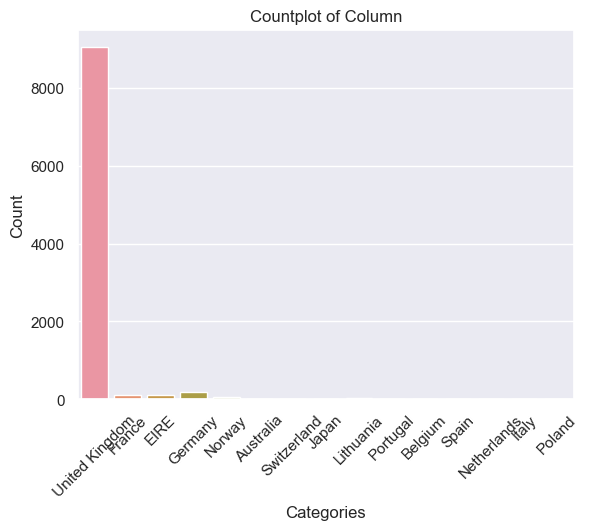

In [23]:
import seaborn as sns
sns.countplot(x='Country', data=df)
plt.title('Countplot of Column')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.show()

### Visualize Numerical Features using Histogram

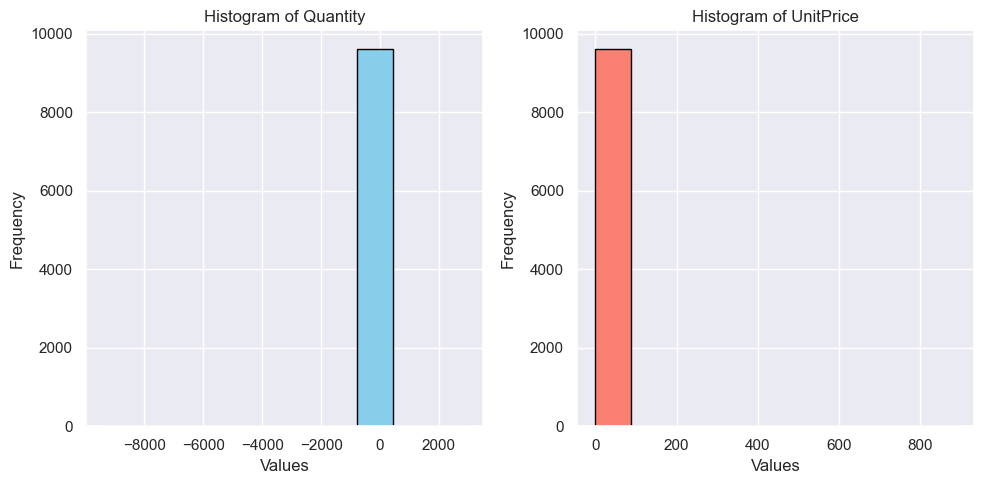

In [24]:
# Assuming 'column1' and 'column2' are the numerical columns you want to visualize
plt.figure(figsize=(10, 5))

# Histogram for column1
plt.subplot(1, 2, 1)
plt.hist(df['Quantity'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Quantity')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Histogram for column2
plt.subplot(1, 2, 2)
plt.hist(df['UnitPrice'], bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of UnitPrice')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


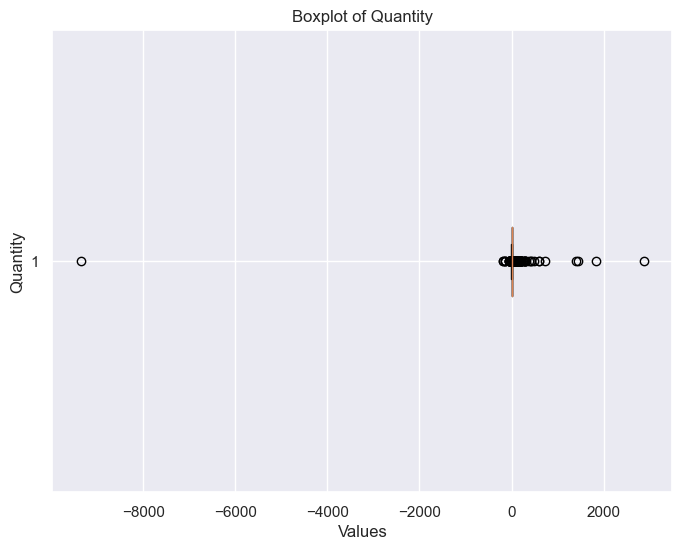

In [32]:
# Assuming 'column_name' is the numeric column you want to visualize
plt.figure(figsize=(8, 6))
plt.boxplot(df['Quantity'], vert=False)  # vert=False for horizontal box plot
plt.title('Boxplot of Quantity')
plt.xlabel('Values')
plt.ylabel('Quantity')
plt.show()


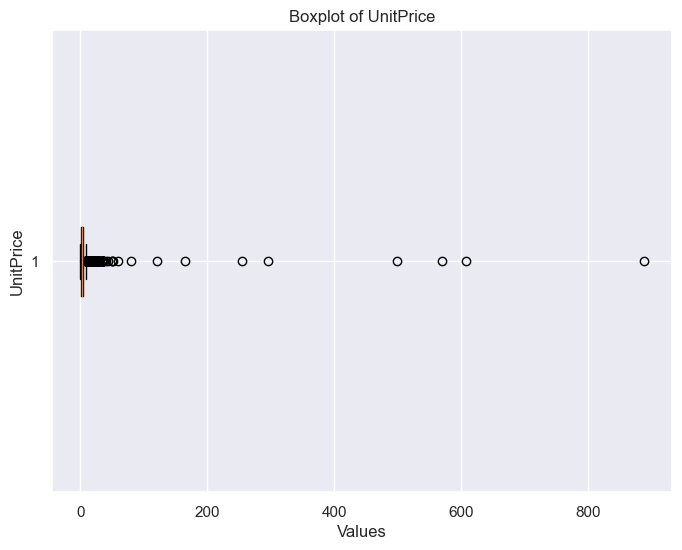

In [33]:
# Assuming 'column_name' is the numeric column you want to visualize
plt.figure(figsize=(8, 6))
plt.boxplot(df['UnitPrice'], vert=False)  # vert=False for horizontal box plot
plt.title('Boxplot of UnitPrice')
plt.xlabel('Values')
plt.ylabel('UnitPrice')
plt.show()
